In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the API key.
from config import weather_api_key
# Import the requests library.
import requests

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print (url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fee71512ceb7e0bc65f9a5b6ec66dccf


In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 1 | caravelas
Processing Record 9 of Set 1 | kyaikkami
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | richards bay
Processing Record 16 of Set 1 | urucui
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | barawe
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | cururupu
Processing Record 21 of Set 1 | bredasdo

Processing Record 35 of Set 4 | gat
Processing Record 36 of Set 4 | naron
Processing Record 37 of Set 4 | mar del plata
Processing Record 38 of Set 4 | narsaq
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | roald
Processing Record 42 of Set 4 | sandviken
Processing Record 43 of Set 4 | plettenberg bay
Processing Record 44 of Set 4 | sosnovo-ozerskoye
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | denpasar
Processing Record 48 of Set 4 | dawlatabad
Processing Record 49 of Set 4 | chokurdakh
Processing Record 50 of Set 4 | kindia
Processing Record 1 of Set 5 | kayes
Processing Record 2 of Set 5 | fort walton beach
Processing Record 3 of Set 5 | calama
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | tiksi
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Set 5 | piacabucu
Processing Record 8 of Set 5 | karasjok
Processing Re

Processing Record 26 of Set 8 | el sauzal
Processing Record 27 of Set 8 | turayf
Processing Record 28 of Set 8 | ust-omchug
Processing Record 29 of Set 8 | bonoua
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | clarksburg
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | quatre cocos
Processing Record 34 of Set 8 | tessalit
Processing Record 35 of Set 8 | micheweni
Processing Record 36 of Set 8 | zhigansk
Processing Record 37 of Set 8 | cacu
Processing Record 38 of Set 8 | pousat
City not found. Skipping...
Processing Record 39 of Set 8 | nakonde
Processing Record 40 of Set 8 | ossora
Processing Record 41 of Set 8 | dikson
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | matadi
Processing Record 44 of Set 8 | ostrovnoy
Processing Record 45 of Set 8 | bandarbeyla
Processing Record 46 of Set 8 | north bend
Processing Record 47 of Set 8 | mana
Processing Record 48 of Set 8 | dzerzhinskoye
Processing Record 

Processing Record 11 of Set 12 | general elizardo aquino
Processing Record 12 of Set 12 | simbahan
Processing Record 13 of Set 12 | high level
Processing Record 14 of Set 12 | fakel
Processing Record 15 of Set 12 | pustoshka
Processing Record 16 of Set 12 | abu kamal
Processing Record 17 of Set 12 | imuris
Processing Record 18 of Set 12 | nantucket
Processing Record 19 of Set 12 | beni suef
Processing Record 20 of Set 12 | kalmunai
Processing Record 21 of Set 12 | wardha
Processing Record 22 of Set 12 | filadelfia
Processing Record 23 of Set 12 | erzin
Processing Record 24 of Set 12 | alexandria
Processing Record 25 of Set 12 | chiredzi
Processing Record 26 of Set 12 | bozoum
Processing Record 27 of Set 12 | nesna
Processing Record 28 of Set 12 | haverfordwest
Processing Record 29 of Set 12 | aswan
Processing Record 30 of Set 12 | nalut
Processing Record 31 of Set 12 | farah
Processing Record 32 of Set 12 | strangnas
Processing Record 33 of Set 12 | wanxian
Processing Record 34 of Set 

In [6]:
len(city_data)

592

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,11.71,100,0,4.61,US,2022-01-31 05:10:11
1,Iqaluit,63.7506,-68.5145,-25.31,74,23,5.01,CA,2022-01-31 05:03:21
2,Port Alfred,-33.5906,26.8910,74.32,84,100,11.79,ZA,2022-01-31 05:09:26
3,Mataura,-46.1927,168.8643,71.47,57,92,4.94,NZ,2022-01-31 05:09:25
4,Hobart,-42.8794,147.3294,86.27,56,20,1.01,AU,2022-01-31 05:10:11
5,Caravelas,-17.7125,-39.2481,77.36,87,64,8.66,BR,2022-01-31 05:06:50
6,Kyaikkami,16.0800,97.5675,76.53,64,35,4.72,MM,2022-01-31 05:10:12
7,Tuktoyaktuk,69.4541,-133.0374,-4.25,96,100,15.79,CA,2022-01-31 05:10:12
8,Sitka,57.0531,-135.3300,33.69,86,0,0.00,US,2022-01-31 05:09:15
9,Kapaa,22.0752,-159.3190,72.12,74,20,5.75,US,2022-01-31 05:07:11


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Get today's date in seconds.
today = time.time()
today

1643606740.5703313

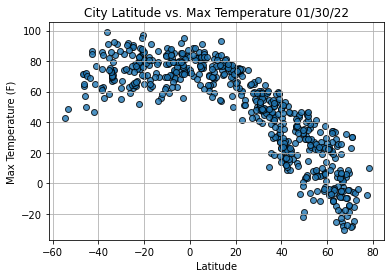

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

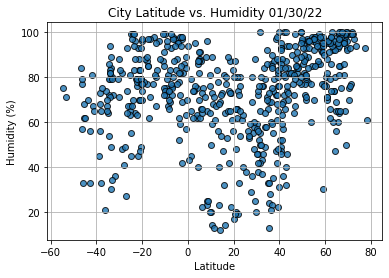

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

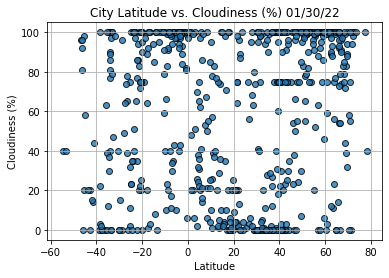

In [14]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

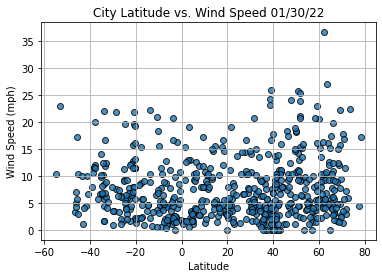

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

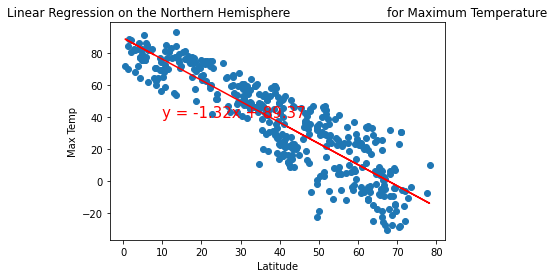

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

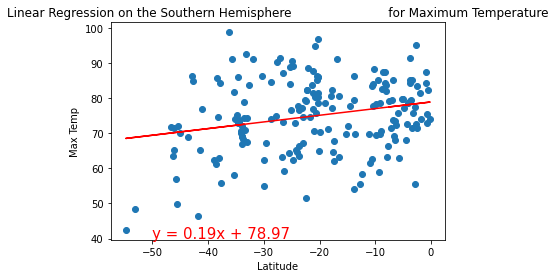

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,40))

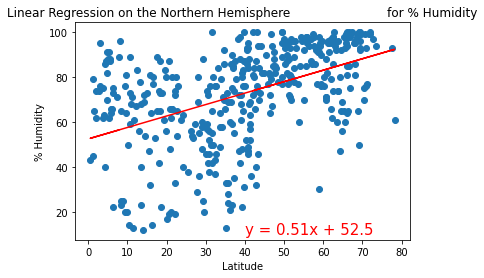

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

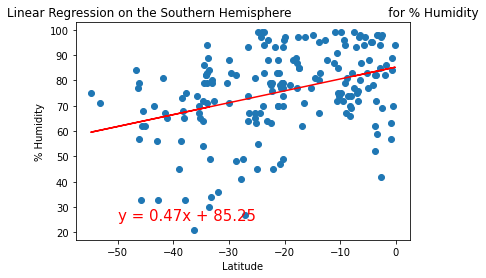

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

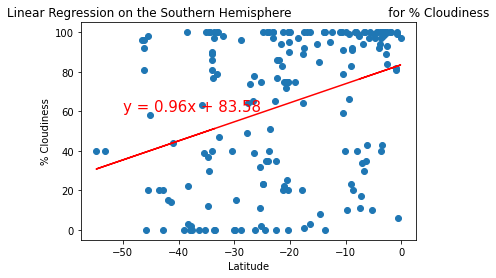

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

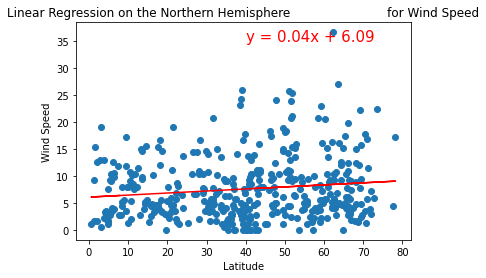

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

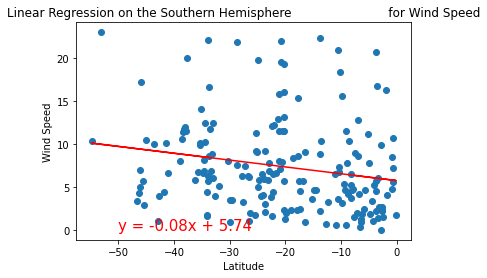

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,0))